In [1]:
import xarray as xr
from dask.distributed import Client
from dask_ml.cluster import KMeans
# import geopandas as gpd
from shapely.geometry import Point
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

In [2]:
client = Client()
client

<Client: 'tcp://127.0.0.1:33807' processes=4 threads=12, memory=50.56 GB>

In [3]:
ds = xr.open_dataset('era5_79_20_decades.nc')

In [4]:
ds

<xarray.Dataset>
Dimensions:          (expver: 2, latitude: 129, longitude: 173, time: 6)
Coordinates:
  * expver           (expver) int32 1 5
  * longitude        (longitude) float32 -18.5 -18.25 -18.0 ... 24.0 24.25 24.5
  * latitude         (latitude) float32 23.5 23.25 23.0 ... -8.0 -8.25 -8.5
  * time             (time) int64 1970 1980 1990 2000 2010 2020
Data variables:
    annual_max_t2m   (time, expver, latitude, longitude) float32 ...
    annual_max_tp    (time, expver, latitude, longitude) float32 ...
    annual_mean_t2m  (time, expver, latitude, longitude) float32 ...
    annual_mean_tp   (time, expver, latitude, longitude) float32 ...
    annual_min_t2m   (time, expver, latitude, longitude) float32 ...
    annual_min_tp    (time, expver, latitude, longitude) float32 ...
    sum_max_t2m      (time, expver, latitude, longitude) float32 ...
    sum_max_tp       (time, expver, latitude, longitude) float32 ...
    sum_mean_t2m     (time, expver, latitude, longitude) float32 ...
    sum_mean_tp      (time, expver, latitude, longitude) float32 ...
    sum_min_t2m      (time, expver, latitude, longitude) float32 ...
    sum_min_tp       (time, expver, latitude, longitude) float32 ...
    win_max_t2m      (time, expver, latitude, longitude) float32 ...
    win_max_tp       (time, expver, latitude, longitude) float32 ...
    win_mean_t2m     (time, expver, latitude, longitude) float32 ...
    win_mean_tp      (time, expver, latitude, longitude) float32 ...
    win_min_t2m      (time, expver, latitude, longitude) float32 ...
    win_min_tp       (time, expver, latitude, longitude) float32 ...

In [5]:
df = ds.to_dask_dataframe()
df = df[df.expver == 1]
t2m_cols = ['annual_max_t2m', 'annual_mean_t2m', 'annual_min_t2m', 'sum_max_t2m', 'sum_mean_t2m', 'sum_min_t2m','win_max_t2m', 'win_mean_t2m', 'win_min_t2m']
(df['win_max_t2m'] > 0).any().compute()

True

In [6]:
#convert to celcius fronm kelvin
for col in t2m_cols:
    df[col] = df[col] - 273.15

In [7]:
#dropping 1970s decade
df = df[df.time != 1970]

In [8]:
df.tail(6)

expver  latitude  longitude  time  annual_max_t2m  annual_max_tp  \
133895       1      -8.5      24.25  2020       23.912628       0.009031   
133897       1      -8.5      24.50  1980       24.317108       0.008935   
133898       1      -8.5      24.50  1990       24.488983       0.008637   
133899       1      -8.5      24.50  2000       24.983856       0.007993   
133900       1      -8.5      24.50  2010       24.995270       0.008565   
133901       1      -8.5      24.50  2020       23.836334       0.009094   

        annual_mean_t2m  annual_mean_tp  annual_min_t2m  annual_min_tp  ...  \
133895        22.802185        0.005412       22.082153   1.862645e-09  ...   
133897        22.352936        0.004163       20.861176   2.837367e-06  ...   
133898        22.614594        0.004015       21.271942   1.784414e-06  ...   
133899        22.805908        0.003630       21.241455   7.779524e-06  ...   
133900        23.076813        0.003510       21.564911   1.862645e-09  ...   
133901        22.714874        0.005322       21.949432   1.862645e-09  ...   

        sum_mean_t2m  sum_mean_tp  sum_min_t2m  sum_min_tp  win_max_t2m  \
133895     22.324615     0.007545    22.082153    0.006054    23.912628   
133897     21.543182     0.007162    20.861176    0.005678    24.317108   
133898     21.760040     0.006893    21.271942    0.005162    24.488983   
133899     21.919067     0.006311    21.241455    0.004388    24.983856   
133900     22.277649     0.006122    21.564911    0.003943    24.995270   
133901     22.213226     0.008084    21.949432    0.006302    23.836334   

        win_max_tp  win_mean_t2m  win_mean_tp  win_min_t2m    win_min_tp  
133895    0.009031     23.279724     0.003278    22.638214  1.862645e-09  
133897    0.004124     23.162689     0.001163    22.179596  2.837367e-06  
133898    0.003792     23.469116     0.001137    22.415009  1.784414e-06  
133899    0.003329     23.692719     0.000949    22.415009  7.779524e-06  
133900    0.003661     23.875946     0.000898    22.589539  1.862645e-09  
133901    0.007093     23.216492     0.002560    22.673157  1.862645e-09  

[6 rows x 22 columns]

In [9]:
df.expver.value_counts().compute()

1    111585
Name: expver, dtype: int64

In [10]:
df[df.expver == 5].head()

Empty DataFrame
Columns: [expver, latitude, longitude, time, annual_max_t2m, annual_max_tp, annual_mean_t2m, annual_mean_tp, annual_min_t2m, annual_min_tp, sum_max_t2m, sum_max_tp, sum_mean_t2m, sum_mean_tp, sum_min_t2m, sum_min_tp, win_max_t2m, win_max_tp, win_mean_t2m, win_mean_tp, win_min_t2m, win_min_tp]
Index: []

[0 rows x 22 columns]

In [11]:
df[df.expver == 1].tail()

expver  latitude  longitude  time  annual_max_t2m  annual_max_tp  \
133897       1      -8.5       24.5  1980       24.317108       0.008935   
133898       1      -8.5       24.5  1990       24.488983       0.008637   
133899       1      -8.5       24.5  2000       24.983856       0.007993   
133900       1      -8.5       24.5  2010       24.995270       0.008565   
133901       1      -8.5       24.5  2020       23.836334       0.009094   

        annual_mean_t2m  annual_mean_tp  annual_min_t2m  annual_min_tp  ...  \
133897        22.352936        0.004163       20.861176   2.837367e-06  ...   
133898        22.614594        0.004015       21.271942   1.784414e-06  ...   
133899        22.805908        0.003630       21.241455   7.779524e-06  ...   
133900        23.076813        0.003510       21.564911   1.862645e-09  ...   
133901        22.714874        0.005322       21.949432   1.862645e-09  ...   

        sum_mean_t2m  sum_mean_tp  sum_min_t2m  sum_min_tp  win_max_t2m  \
133897     21.543182     0.007162    20.861176    0.005678    24.317108   
133898     21.760040     0.006893    21.271942    0.005162    24.488983   
133899     21.919067     0.006311    21.241455    0.004388    24.983856   
133900     22.277649     0.006122    21.564911    0.003943    24.995270   
133901     22.213226     0.008084    21.949432    0.006302    23.836334   

        win_max_tp  win_mean_t2m  win_mean_tp  win_min_t2m    win_min_tp  
133897    0.004124     23.162689     0.001163    22.179596  2.837367e-06  
133898    0.003792     23.469116     0.001137    22.415009  1.784414e-06  
133899    0.003329     23.692719     0.000949    22.415009  7.779524e-06  
133900    0.003661     23.875946     0.000898    22.589539  1.862645e-09  
133901    0.007093     23.216492     0.002560    22.673157  1.862645e-09  

[5 rows x 22 columns]

In [12]:
df.time.value_counts().compute()

2020    22317
2010    22317
2000    22317
1990    22317
1980    22317
Name: time, dtype: int64

In [13]:
df[df.time == 2020].isnull().any().compute()

expver             False
latitude           False
longitude          False
time               False
annual_max_t2m     False
annual_max_tp      False
annual_mean_t2m    False
annual_mean_tp     False
annual_min_t2m     False
annual_min_tp      False
sum_max_t2m        False
sum_max_tp         False
sum_mean_t2m       False
sum_mean_tp        False
sum_min_t2m        False
sum_min_tp         False
win_max_t2m        False
win_max_tp         False
win_mean_t2m       False
win_mean_tp        False
win_min_t2m        False
win_min_tp         False
dtype: bool

In [14]:
#I think I need to drop 2020, 
#even though I'd like to keep it, my features need winter months,
#and I'd probably see a bias if I clustered with a partial year

In [15]:
# df = df[df.time != 2020]

In [16]:
X = df.drop(['latitude', 'longitude', 'time', 'expver'], axis=1)
X.head()

annual_max_t2m  annual_max_tp  annual_mean_t2m  annual_mean_tp  \
1       23.121857       0.000457        20.658691        0.000104   
2       23.264008       0.000624        20.920990        0.000110   
3       23.561035       0.000780        21.006836        0.000113   
4       23.568298       0.000638        21.051727        0.000108   
5       22.417419       0.000080        20.038818        0.000027   

   annual_min_t2m  annual_min_tp  sum_max_t2m  sum_max_tp  sum_mean_t2m  \
1       18.350739       0.000006    23.121857    0.000149     21.292938   
2       18.687561       0.000005    23.264008    0.000164     21.489868   
3       18.695404       0.000007    23.481049    0.000079     21.622040   
4       18.530212       0.000006    23.449402    0.000268     21.690277   
5       18.699524       0.000004    22.417419    0.000080     21.197632   

   sum_mean_tp  sum_min_t2m  sum_min_tp  win_max_t2m  win_max_tp  \
1     0.000044    19.254974    0.000006    22.580536    0.000457   
2     0.000042    19.335541    0.000006    22.744293    0.000623   
3     0.000030    19.551086    0.000007    23.065369    0.000780   
4     0.000069    19.525848    0.000007    23.337036    0.000509   
5     0.000039    20.050201    0.000007    19.227112    0.000022   

   win_mean_t2m  win_mean_tp  win_min_t2m  win_min_tp  
1     20.024475     0.000164    18.350739    0.000032  
2     20.352234     0.000178    18.687561    0.000020  
3     20.391693     0.000196    18.695404    0.000023  
4     20.413147     0.000146    18.530212    0.000011  
5     18.880035     0.000016    18.699524    0.000004

In [17]:
X.isnull().any().compute()

annual_max_t2m     False
annual_max_tp      False
annual_mean_t2m    False
annual_mean_tp     False
annual_min_t2m     False
annual_min_tp      False
sum_max_t2m        False
sum_max_tp         False
sum_mean_t2m       False
sum_mean_tp        False
sum_min_t2m        False
sum_min_tp         False
win_max_t2m        False
win_max_tp         False
win_mean_t2m       False
win_mean_tp        False
win_min_t2m        False
win_min_tp         False
dtype: bool

In [18]:
#using elbow method to find optimal clusters:
distortions = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km.fit(df)
    distortions.append(km.inertia_)

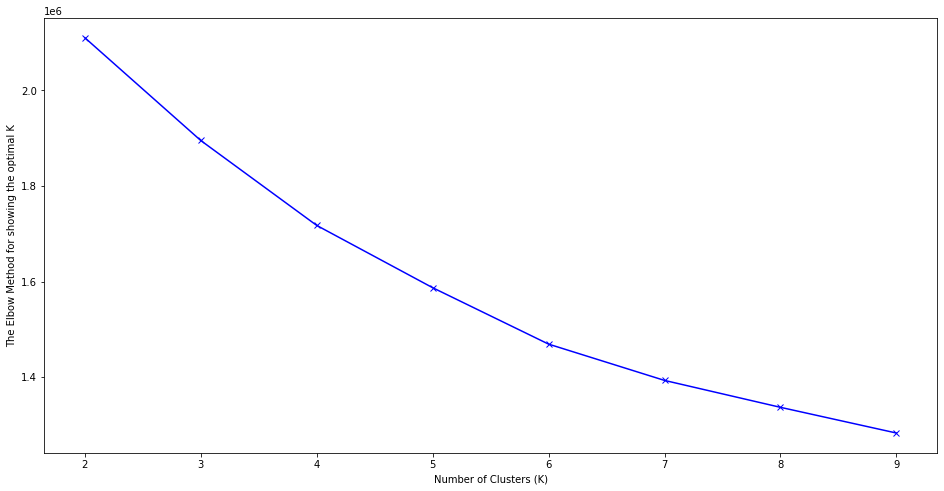

In [19]:
#plotting distortions
plt.figure(figsize=(16, 8))
plt.plot(K[1:], distortions[1:], 'bx-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('The Elbow Method for showing the optimal K')
plt.show()

In [18]:
#let's tak ea look at 5 major zones
km = KMeans(n_clusters = 10)
km.fit(X)
labels = km.predict(X)
labels
df['clust'] = labels
clusters = df.groupby('clust')


In [19]:
df.head()

expver  latitude  longitude  time  annual_max_t2m  annual_max_tp  \
1       1      23.5      -18.5  1980       23.121857       0.000457   
2       1      23.5      -18.5  1990       23.264008       0.000624   
3       1      23.5      -18.5  2000       23.561035       0.000780   
4       1      23.5      -18.5  2010       23.568298       0.000638   
5       1      23.5      -18.5  2020       22.417419       0.000080   

   annual_mean_t2m  annual_mean_tp  annual_min_t2m  annual_min_tp  ...  \
1        20.658691        0.000104       18.350739       0.000006  ...   
2        20.920990        0.000110       18.687561       0.000005  ...   
3        21.006836        0.000113       18.695404       0.000007  ...   
4        21.051727        0.000108       18.530212       0.000006  ...   
5        20.038818        0.000027       18.699524       0.000004  ...   

   sum_mean_tp  sum_min_t2m  sum_min_tp  win_max_t2m  win_max_tp  \
1     0.000044    19.254974    0.000006    22.580536    0.000457   
2     0.000042    19.335541    0.000006    22.744293    0.000623   
3     0.000030    19.551086    0.000007    23.065369    0.000780   
4     0.000069    19.525848    0.000007    23.337036    0.000509   
5     0.000039    20.050201    0.000007    19.227112    0.000022   

   win_mean_t2m  win_mean_tp  win_min_t2m  win_min_tp  clust  
1     20.024475     0.000164    18.350739    0.000032      3  
2     20.352234     0.000178    18.687561    0.000020      3  
3     20.391693     0.000196    18.695404    0.000023      3  
4     20.413147     0.000146    18.530212    0.000011      3  
5     18.880035     0.000016    18.699524    0.000004      3  

[5 rows x 23 columns]

<ipython-input-20-f836dada838f>:3: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  m = Basemap(projection='merc', lon_0=0, llcrnrlat=-8.5, urcrnrlat=23.5, llcrnrlon=-18.5, urcrnrlon = 24.5)
<ipython-input-20-f836dada838f>:11: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  m.drawcountries()


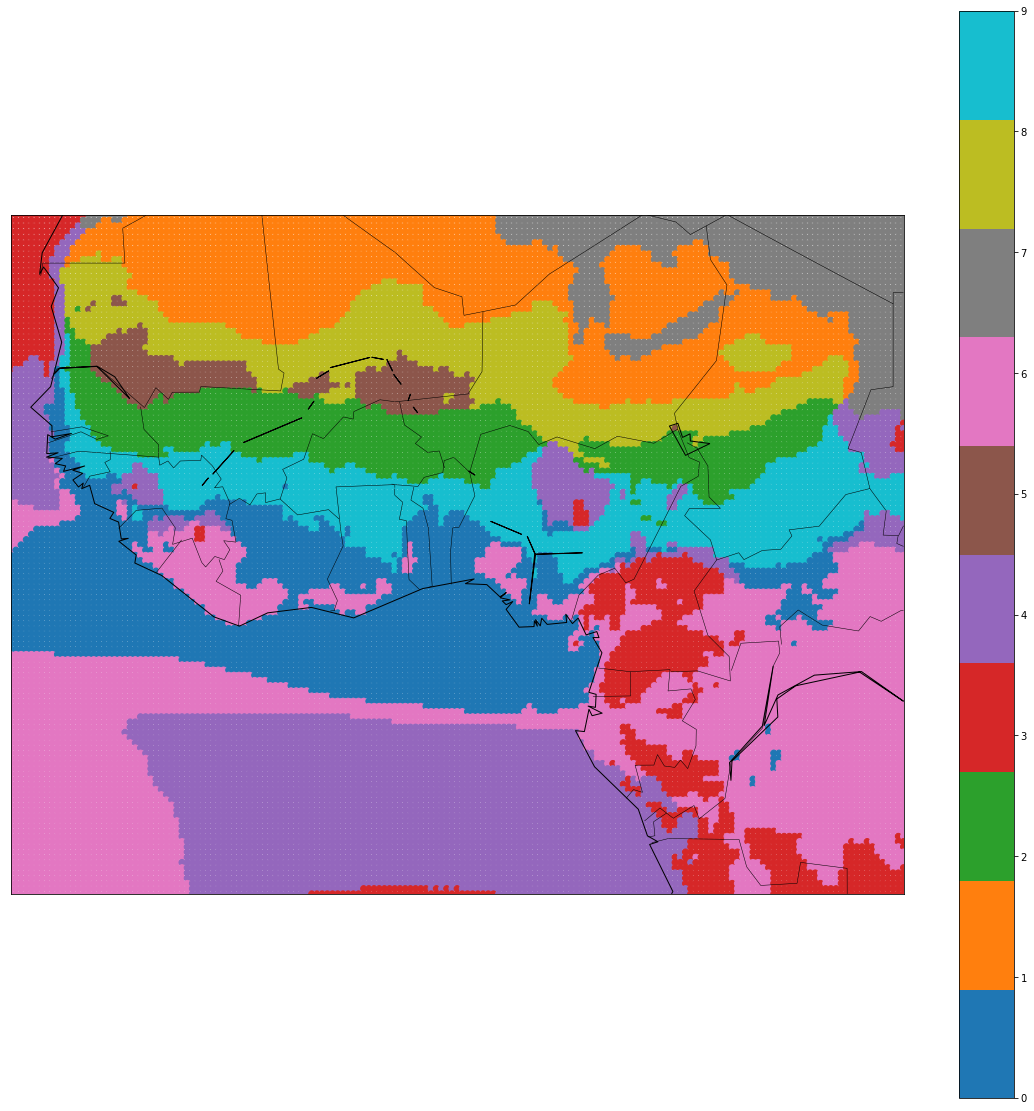

In [20]:
plt.figure(figsize=(20,20))
# ll_lon, ur_lon, ll_lat, ur_lat 
m = Basemap(projection='merc', lon_0=0, llcrnrlat=-8.5, urcrnrlat=23.5, llcrnrlon=-18.5, urcrnrlon = 24.5)
year = df[df.time == 1980]
# map.drawmapboundary(fill_color='aqua')
# map.fillcontinents(color='coral',lake_color='aqua')
lons = year.longitude.to_dask_array(lengths=True).compute()
lats = year.latitude.to_dask_array(lengths=True).compute()
x, y = m(lons, lats) #transform coords
plt.scatter(x, y, c=year.clust, cmap='tab10')
m.drawcountries()
m.drawcoastlines()

plt.colorbar()
plt.show()

<ipython-input-21-c35ff74f6ee5>:3: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  m = Basemap(projection='merc', lon_0=0, llcrnrlat=-8.5, urcrnrlat=23.5, llcrnrlon=-18.5, urcrnrlon = 24.5)
<ipython-input-21-c35ff74f6ee5>:11: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  m.drawcountries(linewidth=1, zorder=2)


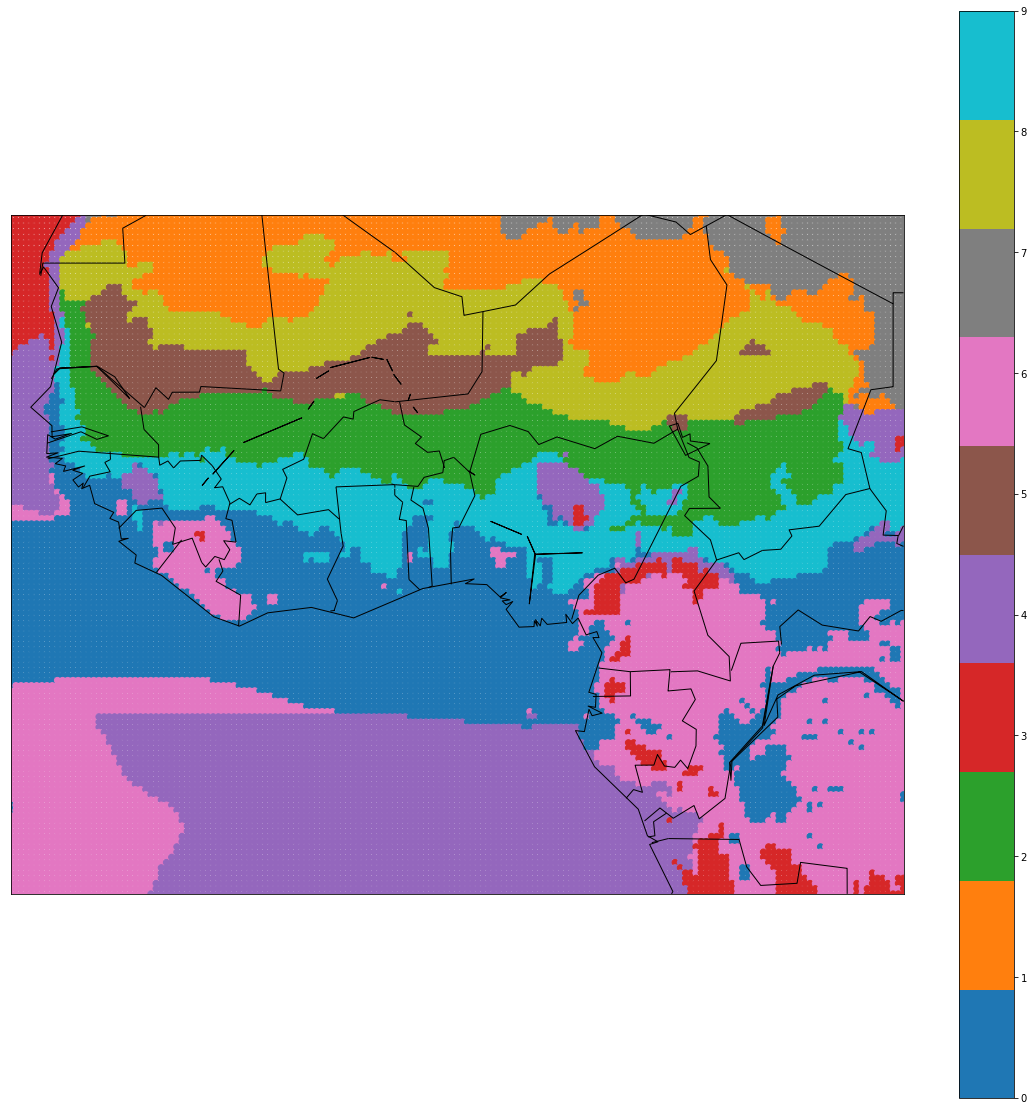

In [21]:
plt.figure(figsize=(20,20))
# ll_lon, ur_lon, ll_lat, ur_lat 
m = Basemap(projection='merc', lon_0=0, llcrnrlat=-8.5, urcrnrlat=23.5, llcrnrlon=-18.5, urcrnrlon = 24.5)

year = df[df.time == 2010]

lons = year.longitude.to_dask_array(lengths=True).compute()
lats = year.latitude.to_dask_array(lengths=True).compute()
x, y = m(lons, lats) #transform coords
plt.scatter(x, y, c=year.clust, cmap='tab10', zorder=1)
m.drawcountries(linewidth=1, zorder=2)
m.drawcoastlines()

plt.colorbar()
plt.show()

In [22]:
means = df.groupby('clust').mean()

In [23]:
means.sum_max_tp.compute()

clust
0    0.008665
1    0.000256
2    0.005248
3    0.006716
4    0.004580
5    0.001534
6    0.006949
7    0.000276
8    0.000963
9    0.007764
Name: sum_max_tp, dtype: float64

In [24]:
means.sum_mean_t2m.compute()

clust
0    26.316326
1    32.289277
2    30.483937
3    22.418130
4    25.465998
5    33.709301
6    24.761223
7    29.000071
8    32.897442
9    27.702748
Name: sum_mean_t2m, dtype: float64

In [25]:
means.sum_mean_tp.compute()

clust
0    0.005172
1    0.000069
2    0.002180
3    0.004992
4    0.002254
5    0.000532
6    0.004661
7    0.000073
8    0.000305
9    0.004330
Name: sum_mean_tp, dtype: float64

In [26]:
means.sum_max_t2m.compute()

clust
0    27.501665
1    34.854355
2    33.732770
3    23.921301
4    27.351174
5    35.518984
6    25.932477
7    31.299551
8    34.842948
9    31.008273
Name: sum_max_t2m, dtype: float64

In [27]:
#6-1 cluster movement shows drought and heating effects
#9-1 cluster moverment shows drought effects
#5 is the 3rd highest heat region and is growing
#I could take pairwise differences of variables of each of the clusters, then order the cluster movement by increasing severity,
#then I'll have a map of areas with low, medium, and high risk of each type of cluster movement

In [28]:
clusters = df[df.time == 1980].groupby('clust')
clusters.clust.value_counts().compute().values #this gives a relative size of each cluster!

array([3212, 2507, 1486, 1353, 3895,  455, 4711, 1271, 1619, 1808])

In [29]:
clusters = df[df.time == 1990].groupby('clust')
clusters.clust.value_counts().compute() #this gives a relative size of each clus

clust  clust
0      0        3561
1      1        2390
2      2        1610
3      3        1106
4      4        4116
5      5         512
6      6        4320
7      7        1058
8      8        1703
9      9        1941
Name: clust, dtype: int64

In [30]:
clusters = df[df.time == 2000].groupby('clust')
clusters.clust.value_counts().compute() #this gives a relative size of each clus

clust  clust
0      0        3721
1      1        2244
2      2        1705
3      3         836
4      4        4051
5      5         745
6      6        4292
7      7         958
8      8        1813
9      9        1952
Name: clust, dtype: int64

In [31]:
clusters = df[df.time == 2010].groupby('clust')
clusters.clust.value_counts().compute() #this gives a relative size of each cluster!

clust  clust
0      0        4319
1      1        2024
2      2        2031
3      3         570
4      4        3989
5      5         984
6      6        3859
7      7         776
8      8        1898
9      9        1867
Name: clust, dtype: int64

In [32]:
from collections import defaultdict

clust_sizes = defaultdict(list)

for decade in [1980, 1990, 2000, 2010]:
    clusters = df[df.time == decade].groupby('clust')
     #this gives a relative size of each clus
    for ix, value in enumerate(clusters.clust.value_counts().compute().values):
        clust_sizes[ix].append(value)
    

In [33]:
clust_sizes

defaultdict(list,
            {0: [3212, 3561, 3721, 4319],
             1: [2507, 2390, 2244, 2024],
             2: [1486, 1610, 1705, 2031],
             3: [1353, 1106, 836, 570],
             4: [3895, 4116, 4051, 3989],
             5: [455, 512, 745, 984],
             6: [4711, 4320, 4292, 3859],
             7: [1271, 1058, 958, 776],
             8: [1619, 1703, 1813, 1898],
             9: [1808, 1941, 1952, 1867]})

Text(0, 0.5, 'Relative Size')

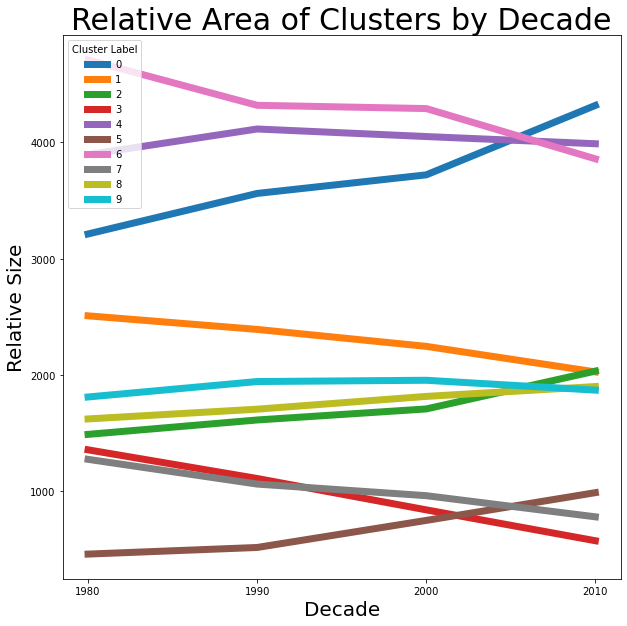

In [34]:
import seaborn as sns
import pandas as pd
plt.figure(figsize=(10, 10))
for clust, values in clust_sizes.items():
    plt.plot([1980, 1990, 2000, 2010], values, label=clust, linewidth=7)

locs, labels = plt.xticks()  # Get the current locations and labels.
plt.xticks(np.arange(1980, 2020, step=10))  # Set label locations.
plt.legend(loc='upper left', title='Cluster Label')
plt.title('Relative Area of Clusters by Decade',  fontdict = {'fontsize' : 30})
plt.xlabel('Decade', fontdict = {'fontsize' : 20})
plt.ylabel('Relative Size', fontdict = {'fontsize' : 20})

In [35]:
clust_size_df

NameError: name 'clust_size_df' is not defined

In [36]:
means.sum_mean_tp.compute().sort_values()

clust
1    0.000069
7    0.000073
8    0.000305
5    0.000532
2    0.002180
4    0.002254
9    0.004330
6    0.004661
3    0.004992
0    0.005172
Name: sum_mean_tp, dtype: float64

In [37]:
df.head()

expver  latitude  longitude  time  annual_max_t2m  annual_max_tp  \
1       1      23.5      -18.5  1980       23.121857       0.000457   
2       1      23.5      -18.5  1990       23.264008       0.000624   
3       1      23.5      -18.5  2000       23.561035       0.000780   
4       1      23.5      -18.5  2010       23.568298       0.000638   
5       1      23.5      -18.5  2020       22.417419       0.000080   

   annual_mean_t2m  annual_mean_tp  annual_min_t2m  annual_min_tp  ...  \
1        20.658691        0.000104       18.350739       0.000006  ...   
2        20.920990        0.000110       18.687561       0.000005  ...   
3        21.006836        0.000113       18.695404       0.000007  ...   
4        21.051727        0.000108       18.530212       0.000006  ...   
5        20.038818        0.000027       18.699524       0.000004  ...   

   sum_mean_tp  sum_min_t2m  sum_min_tp  win_max_t2m  win_max_tp  \
1     0.000044    19.254974    0.000006    22.580536    0.000457   
2     0.000042    19.335541    0.000006    22.744293    0.000623   
3     0.000030    19.551086    0.000007    23.065369    0.000780   
4     0.000069    19.525848    0.000007    23.337036    0.000509   
5     0.000039    20.050201    0.000007    19.227112    0.000022   

   win_mean_t2m  win_mean_tp  win_min_t2m  win_min_tp  clust  
1     20.024475     0.000164    18.350739    0.000032      3  
2     20.352234     0.000178    18.687561    0.000020      3  
3     20.391693     0.000196    18.695404    0.000023      3  
4     20.413147     0.000146    18.530212    0.000011      3  
5     18.880035     0.000016    18.699524    0.000004      3  

[5 rows x 23 columns]

In [38]:
df =df[df.time != 2020]
df.head()

expver  latitude  longitude  time  annual_max_t2m  annual_max_tp  \
1       1      23.5     -18.50  1980       23.121857       0.000457   
2       1      23.5     -18.50  1990       23.264008       0.000624   
3       1      23.5     -18.50  2000       23.561035       0.000780   
4       1      23.5     -18.50  2010       23.568298       0.000638   
7       1      23.5     -18.25  1980       22.984772       0.000464   

   annual_mean_t2m  annual_mean_tp  annual_min_t2m  annual_min_tp  ...  \
1        20.658691        0.000104       18.350739       0.000006  ...   
2        20.920990        0.000110       18.687561       0.000005  ...   
3        21.006836        0.000113       18.695404       0.000007  ...   
4        21.051727        0.000108       18.530212       0.000006  ...   
7        20.558838        0.000100       18.289886       0.000005  ...   

   sum_mean_tp  sum_min_t2m  sum_min_tp  win_max_t2m  win_max_tp  \
1     0.000044    19.254974    0.000006    22.580536    0.000457   
2     0.000042    19.335541    0.000006    22.744293    0.000623   
3     0.000030    19.551086    0.000007    23.065369    0.000780   
4     0.000069    19.525848    0.000007    23.337036    0.000509   
7     0.000040    19.178619    0.000006    22.471069    0.000464   

   win_mean_t2m  win_mean_tp  win_min_t2m  win_min_tp  clust  
1     20.024475     0.000164    18.350739    0.000032      3  
2     20.352234     0.000178    18.687561    0.000020      3  
3     20.391693     0.000196    18.695404    0.000023      3  
4     20.413147     0.000146    18.530212    0.000011      3  
7     19.945190     0.000160    18.289886    0.000028      3  

[5 rows x 23 columns]

In [39]:
#For each lat/lon, I want a list of the history of the cluster movement.
cluster_history = defaultdict(list)
for decade in [1980, 1990, 2000, 2010]:
    dec_df = df[df.time == decade]
    

In [40]:
dec_df = df[df.time == 1980]
test1 = dec_df.clust.compute().values

In [41]:
dec_df = df[df.time == 2010]
test2 = dec_df.clust.compute().values

In [42]:
test3 = [str(i) + str(j) for i, j in zip(test1, test2)]

In [43]:
def get_clust_history(x):
    return ''.join(map(str, x))

In [44]:
hist_df = df[(df.time == 2000) | (df.time == 2010)]
hist_df.head()

expver  latitude  longitude  time  annual_max_t2m  annual_max_tp  \
3        1      23.5     -18.50  2000       23.561035       0.000780   
4        1      23.5     -18.50  2010       23.568298       0.000638   
9        1      23.5     -18.25  2000       23.420990       0.000754   
10       1      23.5     -18.25  2010       23.420990       0.000663   
15       1      23.5     -18.00  2000       23.315338       0.000646   

    annual_mean_t2m  annual_mean_tp  annual_min_t2m  annual_min_tp  ...  \
3         21.006836        0.000113       18.695404       0.000007  ...   
4         21.051727        0.000108       18.530212       0.000006  ...   
9         20.894379        0.000111       18.620575       0.000008  ...   
10        20.928162        0.000110       18.456390       0.000005  ...   
15        20.800873        0.000101       18.531982       0.000005  ...   

    sum_mean_tp  sum_min_t2m  sum_min_tp  win_max_t2m  win_max_tp  \
3      0.000030    19.551086    0.000007    23.065369    0.000780   
4      0.000069    19.525848    0.000007    23.337036    0.000509   
9      0.000031    19.466309    0.000008    22.940674    0.000754   
10     0.000074    19.460999    0.000006    23.204010    0.000510   
15     0.000032    19.398438    0.000006    22.826263    0.000646   

    win_mean_t2m  win_mean_tp  win_min_t2m  win_min_tp  clust  
3      20.391693     0.000196    18.695404    0.000023      3  
4      20.413147     0.000146    18.530212    0.000011      3  
9      20.298645     0.000191    18.620575    0.000019      3  
10     20.297089     0.000146    18.456390    0.000009      3  
15     20.203461     0.000170    18.531982    0.000018      3  

[5 rows x 23 columns]

In [45]:
clust_hist_df = hist_df.groupby(['longitude', 'latitude'])['clust'].apply(lambda x: get_clust_history(x), meta=('history', 'f8')).compute()

In [46]:
clust_hist_df = clust_hist_df.reset_index()
clust_hist_df.head()

longitude  latitude history
0      -18.5     -8.50      66
1      -18.5     -8.25      66
2      -18.5     -8.00      66
3      -18.5     -7.75      66
4      -18.5     -7.50      66

In [47]:
clust_hist_df['history'] = clust_hist_df.history.astype(str)

In [48]:
clust_hist_df.history

0        66
1        66
2        66
3        66
4        66
         ..
22312    77
22313    77
22314    77
22315    77
22316    77
Name: history, Length: 22317, dtype: object

In [49]:
means.sum_max_tp.compute()

clust
0    0.008665
1    0.000256
2    0.005248
3    0.006716
4    0.004580
5    0.001534
6    0.006949
7    0.000276
8    0.000963
9    0.007764
Name: sum_max_tp, dtype: float64

In [50]:
from scipy.spatial.distance import pdist

In [51]:
pdist([list(means.sum_max_tp.compute().values), list(means.sum_max_tp.compute().values)])

array([0.])

In [52]:
list(means.sum_max_tp.compute().values)

[0.00866478261022197,
 0.00025579808241732915,
 0.005248241667080568,
 0.006715572123624841,
 0.004579685705091726,
 0.0015339805339944774,
 0.0069493658622250985,
 0.00027570679636284857,
 0.0009633906149722583,
 0.007763868026100115]

In [53]:
max_tp_df = means.sum_max_tp.compute().reset_index()
max_tp_df

clust  sum_max_tp
0      0    0.008665
1      1    0.000256
2      2    0.005248
3      3    0.006716
4      4    0.004580
5      5    0.001534
6      6    0.006949
7      7    0.000276
8      8    0.000963
9      9    0.007764

In [54]:
tp_severity = defaultdict(int)
for clust1 in max_tp_df.clust:
    for clust2 in max_tp_df.clust:
        x1 = max_tp_df[max_tp_df.clust == clust1].sum_max_tp.values
        x2 = max_tp_df[max_tp_df.clust == clust2].sum_max_tp.values
        tp_severity[str(clust1) + str(clust2)] = 100*((x2-x1)/x1)

In [55]:
sort_severity = sorted(tp_severity.items(), key=lambda x: x[1], reverse=False)
sort_severity
#This marks the percent change in max total precipitation during the summer time for each cluster.
#now I need to find which cluster movements are actually present.
for i in sort_severity:
    print(i[0], i[1])

01 [-97.04784189]
07 [-96.81807601]
91 [-96.70527524]
97 [-96.44884746]
61 [-96.3191162]
31 [-96.19097111]
67 [-96.03263374]
37 [-95.89451515]
21 [-95.12602318]
27 [-94.74668253]
41 [-94.41450573]
47 [-93.97978783]
08 [-88.88153739]
98 [-87.59135766]
68 [-86.13699963]
38 [-85.65437766]
51 [-83.32455486]
05 [-82.296376]
57 [-82.02670828]
28 [-81.64355462]
95 [-80.2420581]
48 [-78.96382684]
65 [-77.92632358]
35 [-77.1578578]
81 [-73.44814466]
87 [-71.38161904]
25 [-70.77153395]
45 [-66.50467668]
04 [-47.14598264]
94 [-41.0128342]
02 [-39.43019804]
58 [-37.19668577]
64 [-34.09922868]
92 [-32.40171459]
34 [-31.80498071]
62 [-24.47884064]
03 [-22.49578061]
32 [-21.84967162]
06 [-19.79757399]
93 [-13.50223753]
24 [-12.73866572]
96 [-10.49093263]
09 [-10.39742859]
71 [-7.22097323]
63 [-3.36424565]
00 [0.]
11 [0.]
22 [0.]
33 [0.]
44 [0.]
55 [0.]
66 [0.]
77 [0.]
88 [0.]
99 [0.]
36 [3.4813674]
17 [7.78298014]
90 [11.60393996]
69 [11.72052501]
42 [14.59829353]
39 [15.60992695]
60 [24.68450765]
23

In [56]:
clust_hist_df

longitude  latitude history
0          -18.5     -8.50      66
1          -18.5     -8.25      66
2          -18.5     -8.00      66
3          -18.5     -7.75      66
4          -18.5     -7.50      66
...          ...       ...     ...
22312       24.5     22.50      77
22313       24.5     22.75      77
22314       24.5     23.00      77
22315       24.5     23.25      77
22316       24.5     23.50      77

[22317 rows x 3 columns]

In [57]:
for i in sort_severity:
    check = clust_hist_df[clust_hist_df.history.str.contains('|'.join(i[0]))]
    if check is not None:
        break

In [58]:
check

longitude  latitude history
16         -18.5     -4.50      60
17         -18.5     -4.25      60
40         -18.5      1.50      60
41         -18.5      1.75      60
42         -18.5      2.00      60
...          ...       ...     ...
22251       24.5      7.25      00
22252       24.5      7.50      00
22253       24.5      7.75      00
22254       24.5      8.00      00
22255       24.5      8.25      40

[6891 rows x 3 columns]

In [59]:
severe_clust_movements = []
for i in sort_severity:
    check = clust_hist_df[clust_hist_df.history.str.contains('|'.join(i[0]))]
    if check is not None:
        severe_clust_movements.append(i[0])
#         if len(severe_clust_movements) > 30: #44
#             break

In [60]:
severe_clust_movements

['01',
 '07',
 '91',
 '97',
 '61',
 '31',
 '67',
 '37',
 '21',
 '27',
 '41',
 '47',
 '08',
 '98',
 '68',
 '38',
 '51',
 '05',
 '57',
 '28',
 '95',
 '48',
 '65',
 '35',
 '81',
 '87',
 '25',
 '45',
 '04',
 '94',
 '02',
 '58',
 '64',
 '92',
 '34',
 '62',
 '03',
 '32',
 '06',
 '93',
 '24',
 '96',
 '09',
 '71',
 '63',
 '00',
 '11',
 '22',
 '33',
 '44',
 '55',
 '66',
 '77',
 '88',
 '99',
 '36',
 '17',
 '90',
 '69',
 '42',
 '39',
 '60',
 '23',
 '30',
 '26',
 '43',
 '29',
 '46',
 '85',
 '20',
 '49',
 '40',
 '54',
 '52',
 '78',
 '18',
 '53',
 '56',
 '84',
 '59',
 '82',
 '75',
 '50',
 '15',
 '83',
 '86',
 '89',
 '80',
 '74',
 '14',
 '72',
 '12',
 '73',
 '76',
 '13',
 '16',
 '79',
 '19',
 '70',
 '10']

In [61]:
severity_dict = {}
for i in sort_severity:
    if i[0] in severe_clust_movements:
        severity_dict[i[0]] = i[1][0]

In [62]:
severity_dict

{'01': -97.04784189143348,
 '07': -96.81807601222918,
 '91': -96.70527523706738,
 '97': -96.44884746319755,
 '61': -96.3191161972378,
 '31': -96.19097110851581,
 '67': -96.03263374200058,
 '37': -95.89451514647673,
 '21': -95.1260231779757,
 '27': -94.74668253003266,
 '41': -94.4145057349038,
 '47': -93.97978782569476,
 '08': -88.88153738749622,
 '98': -87.59135766175328,
 '68': -86.13699963317526,
 '38': -85.65437765781522,
 '51': -83.3245548591655,
 '05': -82.29637599696017,
 '57': -82.02670827608813,
 '28': -81.64355462106298,
 '95': -80.24205809736034,
 '48': -78.96382684293916,
 '65': -77.9263235753238,
 '35': -77.15785780040902,
 '81': -73.44814466303524,
 '87': -71.38161903613856,
 '25': -70.77153394790635,
 '45': -66.50467667925362,
 '04': -47.1459826390912,
 '94': -41.0128341994479,
 '02': -39.430198042255086,
 '58': -37.196685771259816,
 '64': -34.09922867947308,
 '92': -32.40171459075119,
 '34': -31.80498071071619,
 '62': -24.478840643451928,
 '03': -22.495780613094862,
 '32

In [63]:
clust_hist_df

longitude  latitude history
0          -18.5     -8.50      66
1          -18.5     -8.25      66
2          -18.5     -8.00      66
3          -18.5     -7.75      66
4          -18.5     -7.50      66
...          ...       ...     ...
22312       24.5     22.50      77
22313       24.5     22.75      77
22314       24.5     23.00      77
22315       24.5     23.25      77
22316       24.5     23.50      77

[22317 rows x 3 columns]

In [64]:
clust_hist_df['tp_severity'] = clust_hist_df.history.map(severity_dict)

In [65]:
# clust_hist_df['tp_severity'] = clust_hist_df['tp_severity'].fillna(0)
clust_hist_df

longitude  latitude history  tp_severity
0          -18.5     -8.50      66          0.0
1          -18.5     -8.25      66          0.0
2          -18.5     -8.00      66          0.0
3          -18.5     -7.75      66          0.0
4          -18.5     -7.50      66          0.0
...          ...       ...     ...          ...
22312       24.5     22.50      77          0.0
22313       24.5     22.75      77          0.0
22314       24.5     23.00      77          0.0
22315       24.5     23.25      77          0.0
22316       24.5     23.50      77          0.0

[22317 rows x 4 columns]

In [66]:
clust_hist_df.tp_severity.value_counts()

 0.000000       19733
 24.684508        718
 276.621516       390
-32.401715        252
 3.481367         226
 59.227266        197
-7.220973         173
-10.397429        136
 444.767780       108
 51.743292        102
-34.099229         59
-70.771534         57
-31.804981         41
 69.528403         33
 89.200377         31
-19.797574         16
 242.132221        15
 14.598294          9
 1561.071024        9
 1690.351852        4
 11.603940          3
-47.145983          2
-94.414506          1
 47.932746          1
 46.638275          1
Name: tp_severity, dtype: int64

In [67]:
clust_hist_df.history.value_counts()

44    3874
00    3567
66    3515
11    1850
99    1697
22    1647
88    1508
77     776
55     730
60     718
33     569
18     390
92     252
36     226
85     197
71     173
09     136
82     108
46     102
64      59
25      57
34      41
49      33
40      31
06      16
52      15
74       9
42       9
14       4
90       3
04       2
43       1
41       1
29       1
Name: history, dtype: int64

In [68]:
def get_negatives(x):
    if x >= 0:
        return None
    if x < 0:
        return x

clust_hist_df['tp_severity_neg'] = clust_hist_df.tp_severity.apply(lambda x: get_negatives(x))

<!-- # non_null_history_df = clust_hist_df[clust_hist_df.tp_severity.notna()]
 -->

<ipython-input-69-aadca6316a84>:3: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  m = Basemap(projection='merc', lon_0=0, llcrnrlat=-8.5, urcrnrlat=23.5, llcrnrlon=-18.5, urcrnrlon = 24.5)
<ipython-input-69-aadca6316a84>:12: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  m.readshapefile('shapefiles/ni', 'ni')
<ipython-input-69-aadca6316a84>:14: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  m.drawcountries(linewidth=3, zorder=2)


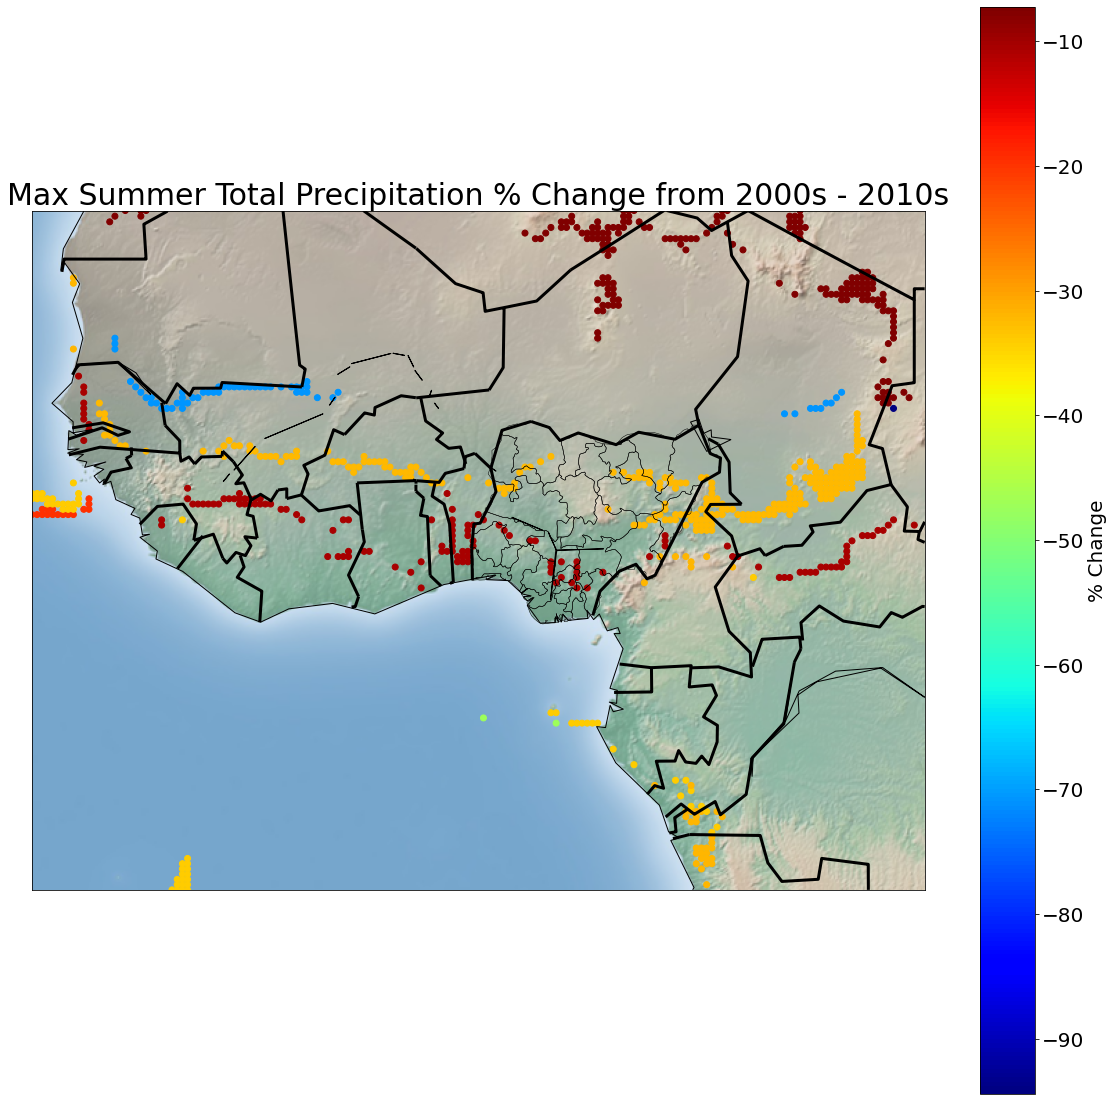

In [69]:
plt.figure(figsize=(20,20))
# ll_lon, ur_lon, ll_lat, ur_lat 
m = Basemap(projection='merc', lon_0=0, llcrnrlat=-8.5, urcrnrlat=23.5, llcrnrlon=-18.5, urcrnrlon = 24.5)


lons = clust_hist_df.longitude.values
lats = clust_hist_df.latitude.values
x, y = m(lons, lats) #transform coords
m.shadedrelief(scale=0.5)
# m.pcolormesh(x, y, clust_hist_df.tp_severity.values)
plt.scatter(x, y, c=clust_hist_df.tp_severity_neg.values, zorder=1, cmap='jet')
m.readshapefile('shapefiles/ni', 'ni')

m.drawcountries(linewidth=3, zorder=2)
m.drawcoastlines()
plt.title('Max Summer Total Precipitation % Change from 2000s - 2010s', fontdict={'fontsize': 30})

cbar = plt.colorbar()
cbar.set_label('% Change', fontdict = {'fontsize' : 20})
cbar.ax.tick_params(labelsize=20)
plt.show()

In [106]:
#now let's do the same thing for temperature
max_t2m_df = means.sum_max_t2m.compute().reset_index()

t2m_severity = defaultdict(int)
for clust1 in max_t2m_df.clust:
    for clust2 in max_t2m_df.clust:
        x1 = max_t2m_df[max_t2m_df.clust == clust1].sum_max_t2m.values
        x2 = max_t2m_df[max_t2m_df.clust == clust2].sum_max_t2m.values
        t2m_severity[str(clust1) + str(clust2)] = 100*((x2-x1)/x1)
        
sort_severity = sorted(t2m_severity.items(), key=lambda x: x[1], reverse=True)

#This marks the percent change in max two meter temperature during the summer time for each cluster.
#now I need to find which cluster movements are actually present.



In [107]:
sort_severity

[('35', array([48.4826597])),
 ('31', array([45.70426341])),
 ('38', array([45.65657599])),
 ('32', array([41.01561621])),
 ('65', array([36.9671871])),
 ('61', array([34.40426746])),
 ('68', array([34.36027841])),
 ('37', array([30.84385057])),
 ('62', array([30.07924513])),
 ('45', array([29.86274019])),
 ('39', array([29.626199])),
 ('05', array([29.15212042])),
 ('41', array([27.43275842])),
 ('48', array([27.39105107])),
 ('01', array([26.73543572])),
 ('08', array([26.69395659])),
 ('42', array([23.3320737])),
 ('02', array([22.65719029])),
 ('67', array([20.69634392])),
 ('69', array([19.5731265])),
 ('30', array([14.96726435])),
 ('95', array([14.54679752])),
 ('47', array([14.43586077])),
 ('34', array([14.33815387])),
 ('07', array([13.80965817])),
 ('75', array([13.48080865])),
 ('49', array([13.37090429])),
 ('09', array([12.75052923])),
 ('91', array([12.40340652])),
 ('98', array([12.36661811])),
 ('71', array([11.35736435])),
 ('78', array([11.3209183])),
 ('92', array([

In [108]:
severe_clust_movements = []
for i in sort_severity:
    check = clust_hist_df[clust_hist_df.history.str.contains('|'.join(i[0]))]
    if check is not None:
        severe_clust_movements.append(i[0])
#         if len(severe_clust_movements) > 30: #44
#             break

In [109]:
severe_clust_movements

['35',
 '31',
 '38',
 '32',
 '65',
 '61',
 '68',
 '37',
 '62',
 '45',
 '39',
 '05',
 '41',
 '48',
 '01',
 '08',
 '42',
 '02',
 '67',
 '69',
 '30',
 '95',
 '47',
 '34',
 '07',
 '75',
 '49',
 '09',
 '91',
 '98',
 '71',
 '78',
 '92',
 '36',
 '72',
 '60',
 '64',
 '25',
 '21',
 '28',
 '85',
 '15',
 '97',
 '40',
 '81',
 '00',
 '11',
 '22',
 '33',
 '44',
 '55',
 '66',
 '77',
 '88',
 '99',
 '18',
 '04',
 '79',
 '51',
 '58',
 '82',
 '12',
 '52',
 '46',
 '06',
 '27',
 '63',
 '29',
 '87',
 '17',
 '89',
 '19',
 '90',
 '94',
 '57',
 '70',
 '43',
 '74',
 '59',
 '03',
 '96',
 '76',
 '20',
 '24',
 '80',
 '10',
 '84',
 '14',
 '50',
 '93',
 '54',
 '26',
 '73',
 '86',
 '16',
 '56',
 '23',
 '83',
 '13',
 '53']

In [110]:
severity_dict = {}
for i in sort_severity:
    if i[0] in severe_clust_movements:
        severity_dict[i[0]] = i[1][0]
clust_hist_df['t2m_severity'] = clust_hist_df.history.map(severity_dict)


In [111]:
def get_positives(x):
    if x <= 0:
        return None
    if x > 0:
        return x
    
clust_hist_df['t2m_severity_pos'] = clust_hist_df.t2m_severity.apply(lambda x: get_positives(x))

<ipython-input-112-d2174142c540>:3: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  m = Basemap(projection='merc', lon_0=0, llcrnrlat=-8.5, urcrnrlat=23.5, llcrnrlon=-18.5, urcrnrlon = 24.5)
<ipython-input-112-d2174142c540>:13: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  m.readshapefile('shapefiles/ni', 'ni')
<ipython-input-112-d2174142c540>:15: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  m.drawcountries(linewidth=3, zorder=2)


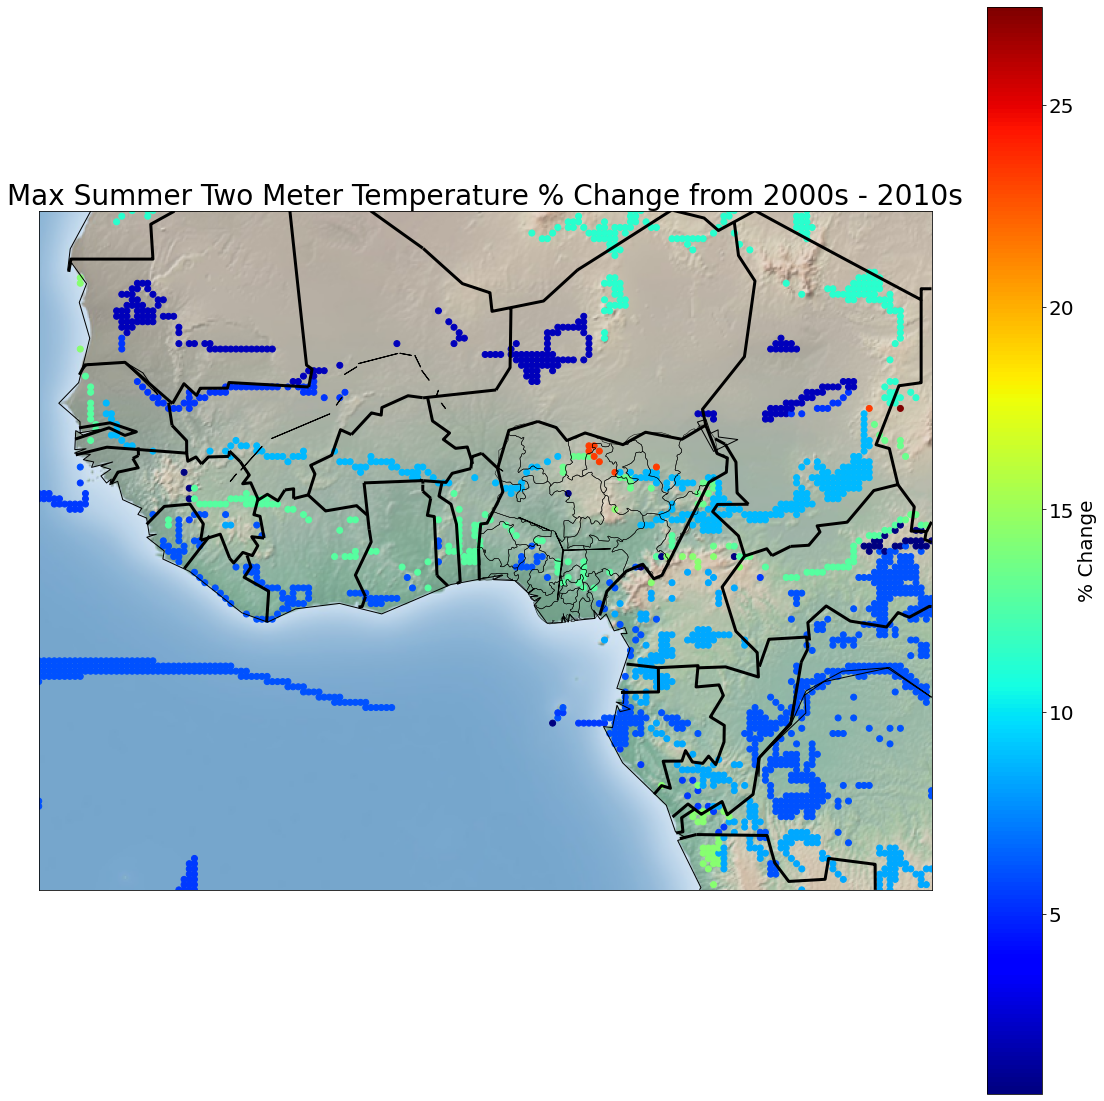

In [112]:
plt.figure(figsize=(20,20))
# ll_lon, ur_lon, ll_lat, ur_lat 
m = Basemap(projection='merc', lon_0=0, llcrnrlat=-8.5, urcrnrlat=23.5, llcrnrlon=-18.5, urcrnrlon = 24.5)


lons = clust_hist_df.longitude.values
lats = clust_hist_df.latitude.values
x, y = m(lons, lats) #transform coords
m.shadedrelief(scale=0.5)
# m.pcolormesh(x, y, clust_hist_df.tp_severity.values)
plt.scatter(x, y, c=clust_hist_df.t2m_severity_pos.values, zorder=1, cmap='jet')

m.readshapefile('shapefiles/ni', 'ni')

m.drawcountries(linewidth=3, zorder=2)
m.drawcoastlines()
plt.title('Max Summer Two Meter Temperature % Change from 2000s - 2010s', fontdict={'fontsize': 28})
cbar = plt.colorbar()
cbar.set_label('% Change', fontdict = {'fontsize' : 20})
cbar.ax.tick_params(labelsize=20)
plt.show()

In [113]:
#Bauchi state seems to be getting hit the hardest
#Ekkiti is also hit with less rainfall and more heat
#Followed by Sokoto and Kebbi (only with heat)
#Kaduna (large agriculture supplier) is getting hit with both less rainfall and high heat
#My recommendation would be to start with addressing farmers in Kaduna

In [96]:
clust_hist_df

longitude  latitude history  tp_severity  tp_severity_neg  \
0          -18.5     -8.50      66          0.0              NaN   
1          -18.5     -8.25      66          0.0              NaN   
2          -18.5     -8.00      66          0.0              NaN   
3          -18.5     -7.75      66          0.0              NaN   
4          -18.5     -7.50      66          0.0              NaN   
...          ...       ...     ...          ...              ...   
22312       24.5     22.50      77          0.0              NaN   
22313       24.5     22.75      77          0.0              NaN   
22314       24.5     23.00      77          0.0              NaN   
22315       24.5     23.25      77          0.0              NaN   
22316       24.5     23.50      77          0.0              NaN   

       t2m_severity  t2m_severity_pos  
0               0.0               NaN  
1               0.0               NaN  
2               0.0               NaN  
3               0.0               NaN  
4               0.0               NaN  
...             ...               ...  
22312           0.0               NaN  
22313           0.0               NaN  
22314           0.0               NaN  
22315           0.0               NaN  
22316           0.0               NaN  

[22317 rows x 7 columns]

In [120]:
#(2.69170169436, 4.24059418377, 14.5771777686, 13.8659239771)) Nigeria bounding box
lon_mask = clust_hist_df.longitude.between(2.5, 14.5)
lat_mask = clust_hist_df.latitude.between(4, 14)

In [123]:
clust_hist_df_nigeria = clust_hist_df[(lon_mask & lat_mask)]

<ipython-input-146-5e0e48c6b0da>:3: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  m = Basemap(projection='merc', lon_0=0, llcrnrlat=4, urcrnrlat=14.5, llcrnrlon=2.5, urcrnrlon = 14, resolution='h')
<ipython-input-146-5e0e48c6b0da>:8: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  m.drawcountries(linewidth=3, zorder=2)
<ipython-input-146-5e0e48c6b0da>:9: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  m.readshapefile('shapefiles/ni', 'ni')


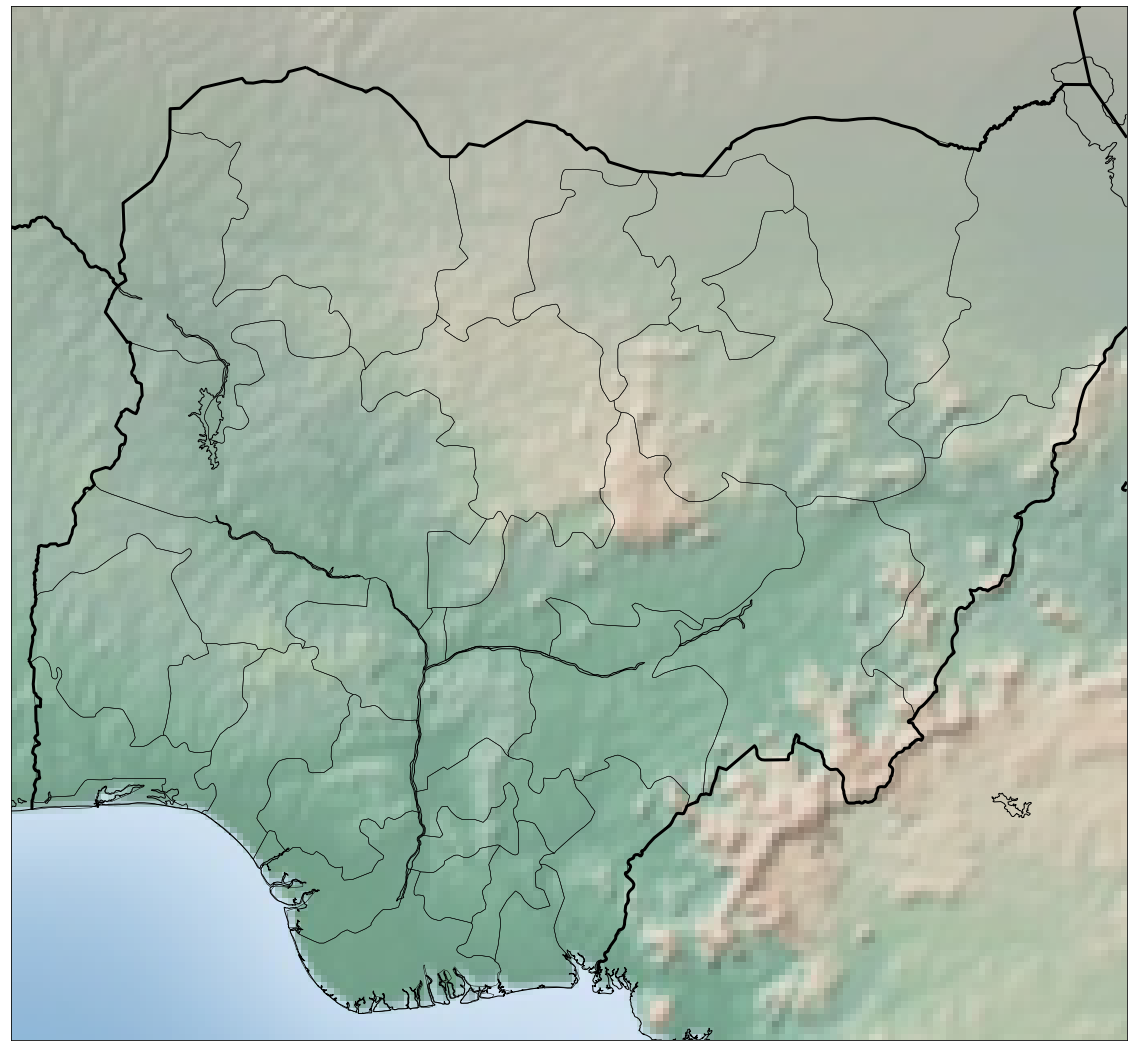

In [146]:
plt.figure(figsize=(20,20))

m = Basemap(projection='merc', lon_0=0, llcrnrlat=4, urcrnrlat=14.5, llcrnrlon=2.5, urcrnrlon = 14, resolution='h')
lons = clust_hist_df_nigeria.longitude.values
lats = clust_hist_df_nigeria.latitude.values
x, y = m(lons, lats) #transform coords
m.shadedrelief(scale=0.5)
m.drawcountries(linewidth=3, zorder=2)
m.readshapefile('shapefiles/ni', 'ni')
m.drawcoastlines()


<ipython-input-125-57a40a3cc3d3>:3: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  m = Basemap(projection='merc', lon_0=0, llcrnrlat=-8.5, urcrnrlat=23.5, llcrnrlon=-18.5, urcrnrlon = 24.5)
<ipython-input-125-57a40a3cc3d3>:12: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  m.readshapefile('shapefiles/ni', 'ni')
<ipython-input-125-57a40a3cc3d3>:14: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  m.drawcountries(linewidth=3, zorder=2)


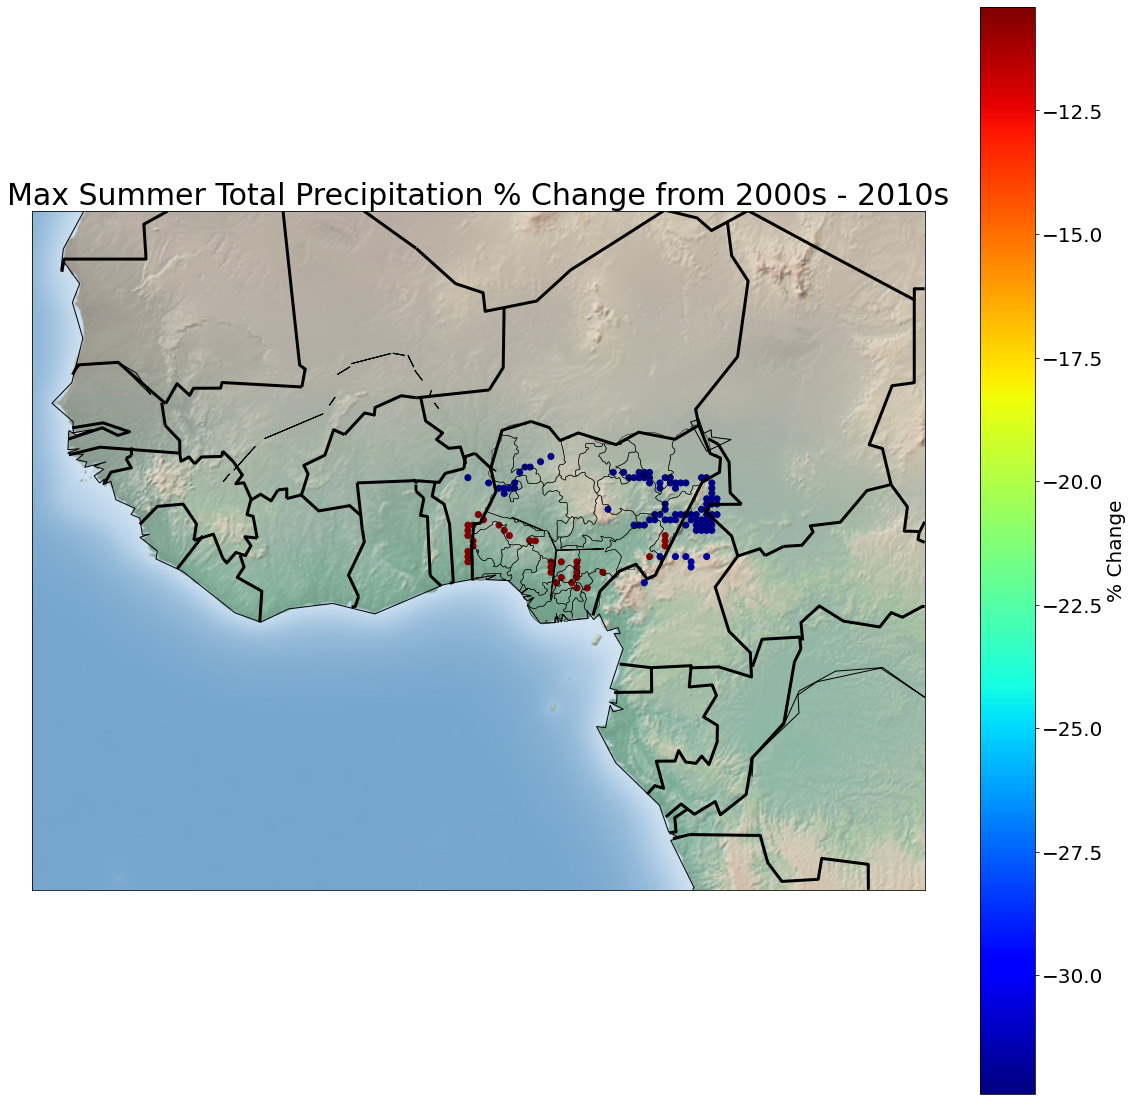

In [125]:
plt.figure(figsize=(20,20))
# ll_lon, ur_lon, ll_lat, ur_lat 
m = Basemap(projection='merc', lon_0=0, llcrnrlat=-8.5, urcrnrlat=23.5, llcrnrlon=-18.5, urcrnrlon = 24.5)


lons = clust_hist_df_nigeria.longitude.values
lats = clust_hist_df_nigeria.latitude.values
x, y = m(lons, lats) #transform coords
m.shadedrelief(scale=0.5)
# m.pcolormesh(x, y, clust_hist_df.tp_severity.values)
plt.scatter(x, y, c=clust_hist_df_nigeria.tp_severity_neg.values, zorder=1, cmap='jet')
m.readshapefile('shapefiles/ni', 'ni')

m.drawcountries(linewidth=3, zorder=2)
m.drawcoastlines()
plt.title('Max Summer Total Precipitation % Change from 2000s - 2010s', fontdict={'fontsize': 30})

cbar = plt.colorbar()
cbar.set_label('% Change', fontdict = {'fontsize' : 20})
cbar.ax.tick_params(labelsize=20)
plt.show()

<ipython-input-141-bad87a95083e>:3: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  m = Basemap(projection='merc', lon_0=0, llcrnrlat=4, urcrnrlat=14.5, llcrnrlon=2.5, urcrnrlon = 14, resolution='h')
<ipython-input-141-bad87a95083e>:12: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  m.readshapefile('shapefiles/ni', 'ni')
<ipython-input-141-bad87a95083e>:14: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  m.drawcountries(linewidth=3, zorder=2)


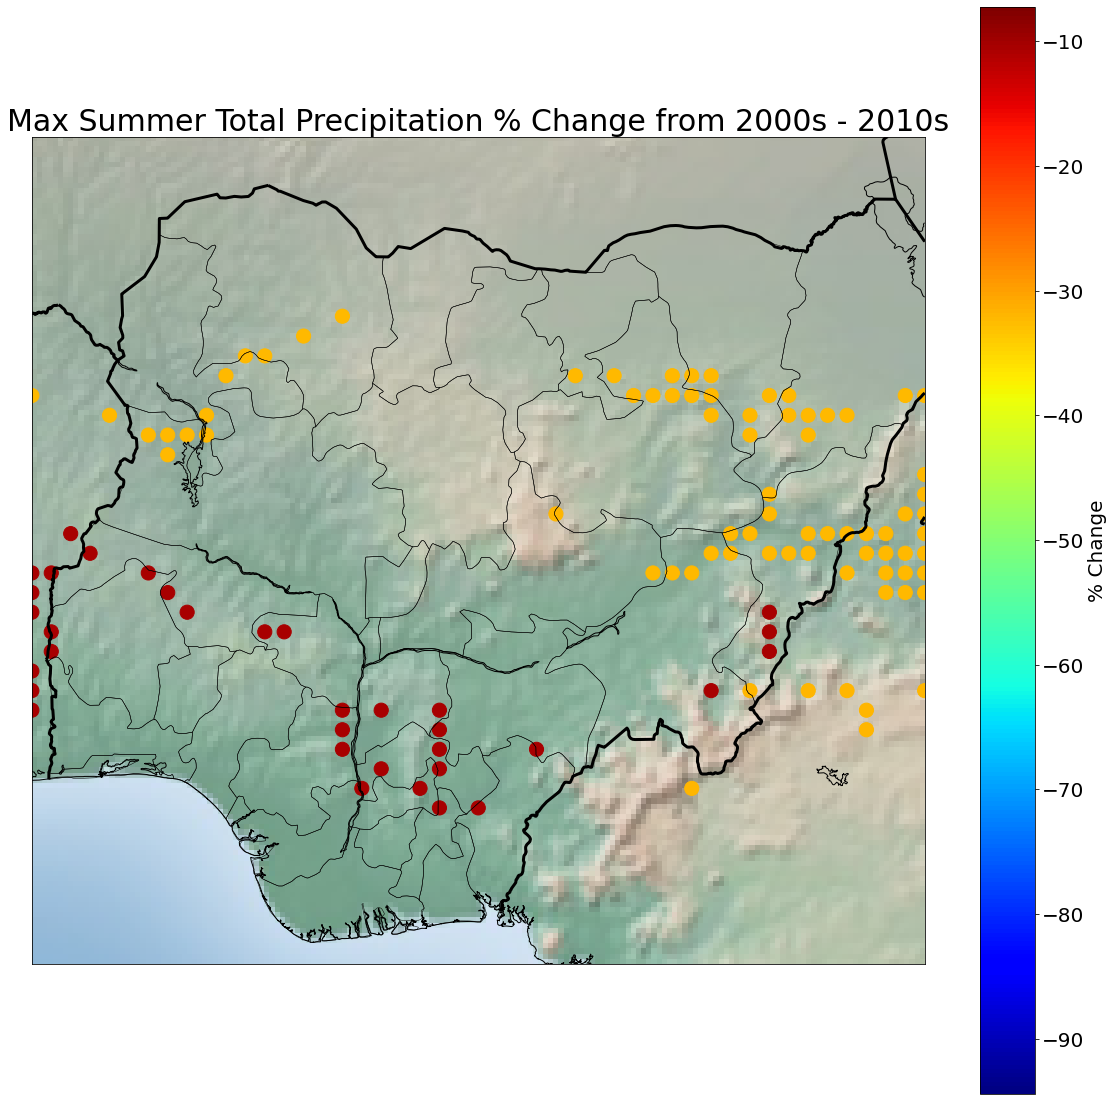

In [141]:
plt.figure(figsize=(20,20))
# ll_lon, ur_lon, ll_lat, ur_lat 
m = Basemap(projection='merc', lon_0=0, llcrnrlat=4, urcrnrlat=14.5, llcrnrlon=2.5, urcrnrlon = 14, resolution='h')


lons = clust_hist_df.longitude.values
lats = clust_hist_df.latitude.values
x, y = m(lons, lats) #transform coords
m.shadedrelief(scale=0.5)
# m.pcolormesh(x, y, clust_hist_df.tp_severity.values)
plt.scatter(x, y, c=clust_hist_df.tp_severity_neg.values, zorder=1, cmap='jet', s=200)
m.readshapefile('shapefiles/ni', 'ni')

m.drawcountries(linewidth=3, zorder=2)
m.drawcoastlines()
plt.title('Max Summer Total Precipitation % Change from 2000s - 2010s', fontdict={'fontsize': 30})

cbar = plt.colorbar()
cbar.set_label('% Change', fontdict = {'fontsize' : 20})
cbar.ax.tick_params(labelsize=20)
plt.show()

<ipython-input-143-1b247bd1541b>:3: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  m = Basemap(projection='merc', lon_0=0, llcrnrlat=4, urcrnrlat=14.5, llcrnrlon=2.5, urcrnrlon = 14, resolution='h')
<ipython-input-143-1b247bd1541b>:12: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  m.readshapefile('shapefiles/ni', 'ni')
<ipython-input-143-1b247bd1541b>:14: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  m.drawcountries(linewidth=3, zorder=2)


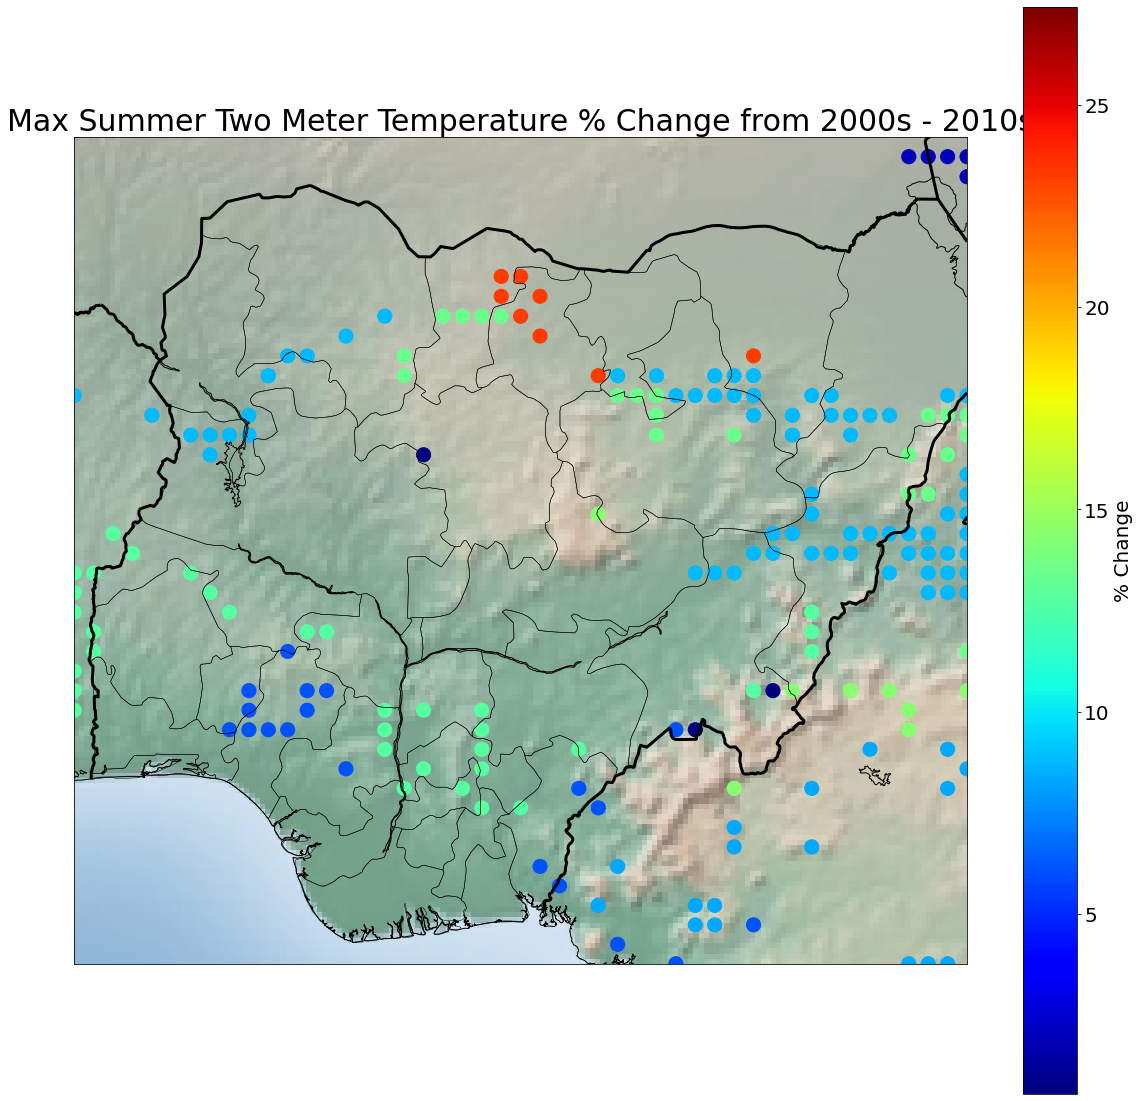

In [143]:
plt.figure(figsize=(20,20))
# ll_lon, ur_lon, ll_lat, ur_lat 
m = Basemap(projection='merc', lon_0=0, llcrnrlat=4, urcrnrlat=14.5, llcrnrlon=2.5, urcrnrlon = 14, resolution='h')


lons = clust_hist_df.longitude.values
lats = clust_hist_df.latitude.values
x, y = m(lons, lats) #transform coords
m.shadedrelief(scale=0.5)
# m.pcolormesh(x, y, clust_hist_df.tp_severity.values)
plt.scatter(x, y, c=clust_hist_df.t2m_severity_pos.values, zorder=1, cmap='jet', s=200)
m.readshapefile('shapefiles/ni', 'ni')

m.drawcountries(linewidth=3, zorder=2)
m.drawcoastlines()
plt.title('Max Summer Two Meter Temperature % Change from 2000s - 2010s', fontdict={'fontsize': 30})

cbar = plt.colorbar()
cbar.set_label('% Change', fontdict = {'fontsize' : 20})
cbar.ax.tick_params(labelsize=20)
plt.show()